In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models


In [ ]:
df = pd.read_csv("fire_smoke_dataset.csv")


In [ ]:
df = df[df["label"].isin(["fire", "smoke"])]


In [ ]:
X = df.drop(columns=["id", "image_name", "label"])
y = df["label"]


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = models.Sequential([
    layers.Conv2D(16, (2,1), activation='relu', input_shape=(X_train.shape[1], 1, 1)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_split=0.2, verbose=1)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.3024 - loss: 0.7169 - val_accuracy: 0.7143 - val_loss: 0.6819
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4860 - loss: 0.6976 - val_accuracy: 0.7143 - val_loss: 0.6788
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4940 - loss: 0.6926 - val_accuracy: 0.7143 - val_loss: 0.6752
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6928 - loss: 0.6817 - val_accuracy: 0.8571 - val_loss: 0.6731
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6674 - loss: 0.6872 - val_accuracy: 0.7143 - val_loss: 0.6701
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7315 - loss: 0.6755 - val_accuracy: 0.7143 - val_loss: 0.6673
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6074 - loss: 0.6731 - val_accuracy: 0.5714 - val_loss: 0.6643
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5896 - loss: 0.6672 - val_accuracy: 0.5714 - val_loss: 0.6605


In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.38


In [ ]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], -1), y_train,
                    epochs=50, batch_size=4,
                    validation_split=0.2, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.4924 - loss: 0.6984 - val_accuracy: 0.4286 - val_loss: 0.6997
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4800 - loss: 0.6864 - val_accuracy: 0.5714 - val_loss: 0.6915
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6142 - loss: 0.6683 - val_accuracy: 0.7143 - val_loss: 0.6888
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7300 - loss: 0.6508 - val_accuracy: 0.7143 - val_loss: 0.6875
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7327 - loss: 0.6567 - val_accuracy: 0.5714 - val_loss: 0.6855
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7740 - loss: 0.6644 - val_accuracy: 0.5714 - val_loss: 0.6829
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8052 - loss: 0.6478 - val_accuracy: 0.5714 - val_loss: 0.6817
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7531 - loss: 0.6654 - val_accuracy: 0.5714 - val_loss: 0.6768


In [ ]:
loss, acc = model.evaluate(X_test.reshape(X_test.shape[0], -1), y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.62


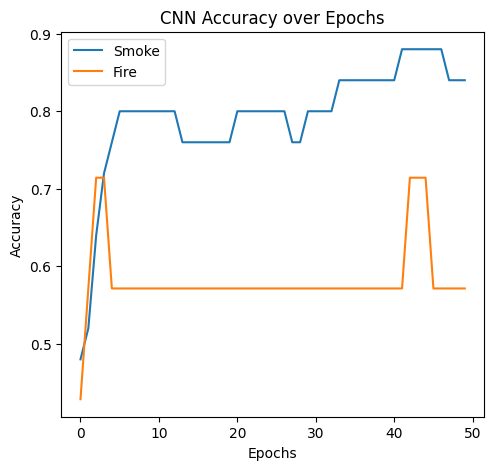

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Smoke')
plt.plot(history.history['val_accuracy'], label='Fire')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy over Epochs")
plt.legend()

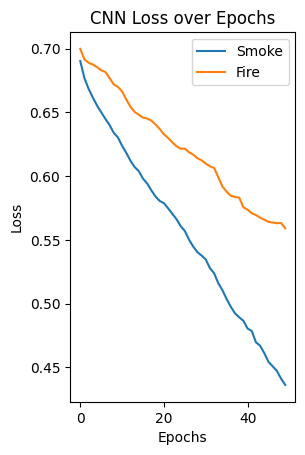

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Smoke')
plt.plot(history.history['val_loss'], label='Fire')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN Loss over Epochs")
plt.legend()

plt.show()